In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

**Q1.** Given the following data, build a decision tree with *three* leaves. 

x|y
-|-
0|4
1|5
2|6
4|100

Use MSE as the mesure of quality in the nodes. That means, we have an impurity (entropy in case of classification) $$H(R)=\frac{1}{N}\sum(y_i-y_{*})^2.$$
To find the minimum, we can take a derivative $$H'(R)=\frac{2}{N}\sum(y_i-y_{*})=0 =2(\frac{1}{N}\sum y_i -y_{*})\Rightarrow y_{*}=\bar{y}.$$ And quality of the split is given by
$$Q=H(R)-\frac{|R_l|}{|R|}H(R_l)-\frac{|R_r|}{|R|}H(R_r)\to max.$$
$$\tilde{Q}=\frac{|R_l|}{|R|}H(R_l)+\frac{|R_r|}{|R|}H(R_r)\to \min.$$

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_leaf_nodes=3, random_state=0)

In [ ]:
X = np.array([0, 1, 2, 4]).reshape(-1,1)
y = np.array([4, 5, 6, 100])

In [ ]:
reg.fit(X,y)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=0)

In [ ]:
from sklearn.tree import plot_tree

[Text(0.6, 0.8333333333333334, 'X[0] <= 3.0\nsquared_error = 1692.688\nsamples = 4\nvalue = 28.75'),
 Text(0.4, 0.5, 'X[0] <= 0.5\nsquared_error = 0.667\nsamples = 3\nvalue = 5.0'),
 Text(0.2, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 4.0'),
 Text(0.6, 0.16666666666666666, 'squared_error = 0.25\nsamples = 2\nvalue = 5.5'),
 Text(0.8, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 100.0')]

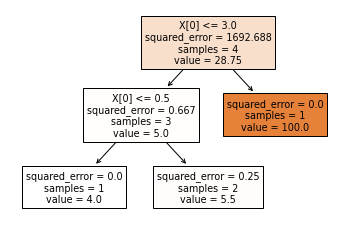

In [ ]:
plot_tree(reg, filled=True)

In [ ]:
X_test = np.arange(0,5,0.05)
y_pred = reg.predict(X_test.reshape(-1,1))

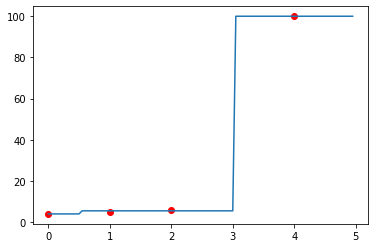

In [ ]:
plt.plot(X_test, y_pred)
plt.scatter(X,y, c='red')

# Ensemble of Models

## Vote

## Bootstrap Aggregation (Bagging)

## Random Forest

## Gradient Boosting

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.datasets import make_moons
#blobs = make_blobs(n_samples=400, random_state=5, n_features=2, centers=2)
#blobs = make_classification(n_samples=400, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=19)
blobs = make_moons(n_samples=400, noise=0.7, random_state=56)
X = blobs[0]
y = blobs[1]

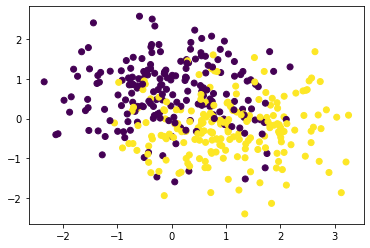

In [ ]:
plt.scatter(X[:,0],X[:,1], c=y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


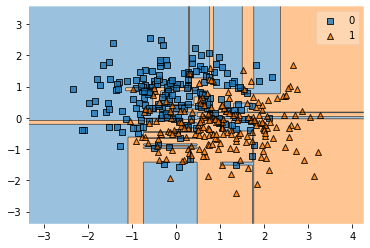

In [ ]:
plot_decision_regions(X,y,clf)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


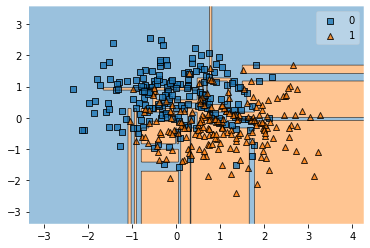

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=45)
clf.fit(X_train,y_train)
plot_decision_regions(X,y,clf)

Maggiority vote

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20, max_samples=0.9, bootstrap=False, random_state=4).fit(X, y)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


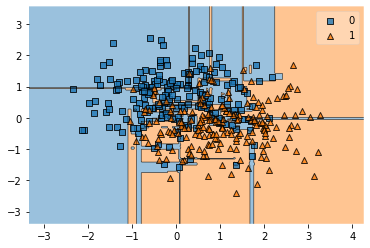

In [ ]:
plot_decision_regions(X,y,clf)

In [ ]:
X = np.arange(1,5,0.05)
y = np.sin(X)
y[::10] += 0.4*np.random.randn(len(y[::10]))

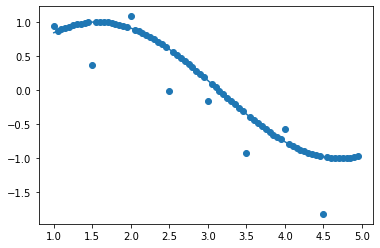

In [ ]:
plt.scatter(X,y)
plt.plot(X, np.sin(X))

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
classifiers = {}
for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y, test_size=0.2, random_state=i)
  classifiers['clf'+str(i)] = DecisionTreeRegressor(max_depth=2)
  classifiers['clf'+str(i)].fit(X_train, y_train)

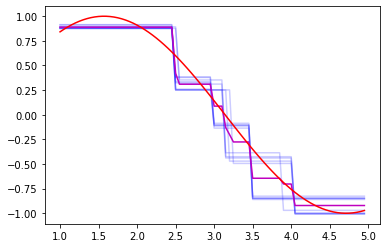

In [ ]:
y_mean = np.zeros(X.shape[0])
for i in range(10):
    y_tmp = classifiers['clf'+str(i)].predict(X.reshape(-1,1))
    plt.plot(X, y_tmp, c='blue', alpha=0.2)
    y_mean +=y_tmp
plt.plot(X, y_mean/10, c='m')
plt.plot(X, np.sin(X), c='r')
plt.show()

In [ ]:
y_mean = np.sum(classifiers['clf'+str(i)].predict(X.reshape(-1,1)) for i in range(10))/10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """Entry point for launching an IPython kernel.


## Bias - Variance Decomposition
$$
Error = Bias+Variance+Noise
$$
Linear model has usually larger bais

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
classifiers = {}
for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y, test_size=0.2, random_state=i)
  classifiers['clf'+str(i)] = LinearRegression()
  classifiers['clf'+str(i)].fit(X_train, y_train)

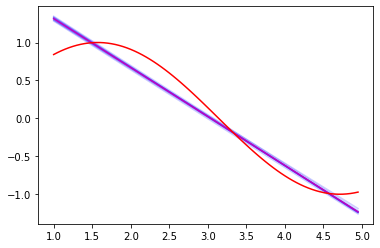

In [ ]:
y_mean = np.zeros(X.shape[0])
for i in range(10):
    y_tmp = classifiers['clf'+str(i)].predict(X.reshape(-1,1))
    plt.plot(X, y_tmp, c='blue', alpha=0.2)
    y_mean +=y_tmp
plt.plot(X, y_mean/10, c='m')
plt.plot(X, np.sin(X), c='r')
plt.show()

Variance of Bagging
$$
Variance(a) = \frac{1}{N} Variance (a_n) + Cov(a_n, a_m)
$$
Deep trees have small bias. To get smaller variance, we should take independent models.
##Bootstrap

In [ ]:
from sklearn.ensemble import BaggingRegressor
clf = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=5), max_samples=1.0, n_estimators=10).fit(X.reshape(-1,1), y)

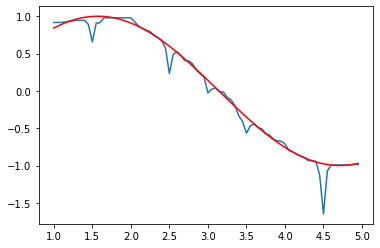

In [ ]:
plt.plot(X, clf.predict(X.reshape(-1,1)))
plt.plot(X, np.sin(X), c='r')

**Q2.** A ML engineer has found the following observations


x|y
-|-
1|6
2|6
3|12
4|18

with two trees $x>2.5$ and $x>3.5$

He decided to use Bagging. For the first tree he has samples [1, 1, 2, 3] and for the secod tree [2, 3, 4, 4]. 

Which predictions will he obtain in the leaves minimizing MSE?


##Random number of features for a tree -> Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators=50, max_depth=5)

In [ ]:
rf.fit(X.reshape(-1,1), y)

RandomForestRegressor(max_depth=5, n_estimators=50)

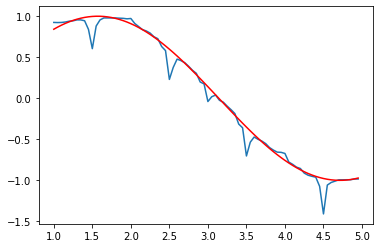

In [ ]:
plt.plot(X, rf.predict(X.reshape(-1,1)))
plt.plot(X, np.sin(X), c='r')

# 

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


0.775

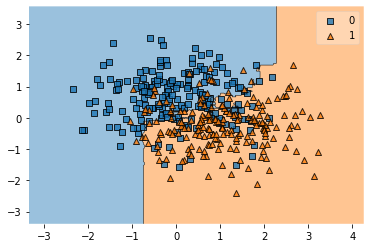

In [ ]:
X_old = blobs[0]
y_old = blobs[1]
X_train_old, X_test_old, y_train_old, y_test_old = train_test_split(X_old, y_old, test_size=0.1, random_state=42)
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(min_samples_leaf=3, max_depth=5, oob_score=True).fit(X_train_old,y_train_old) #n_estimators=20,
plot_decision_regions(X_old,y_old,rf_clf)
rf_clf.oob_score_

Recommendations: max_features = $\frac{d}{3}$ for regression and $\sqrt{d}$ for classification. (See Leo Breiman. Random forests. Machine Learning, 45(1):5–32, October 2001)

In [ ]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
rf_clf.feature_importances_

array([0.46913069, 0.53086931])

# Boosting
Random Forest is the model without hyper parameters and out-of-bag validation, but there exists a better method: Gradient Boosting, which is used as final model in the commercial business.

Problems:
1. If we take a biased base model for Bagging, then the ensemble will be biased. Bagging fixes only variance.
2. RF is time consumming

Assume, we have models $a_1(x), a_2(x),\ldots, a_K(x)$ and we want to build the composition 
$$
a(x) = \sum_{k=1}^K a_k(x).
$$
Fit the first model as usual (minimizing loss function):
$$
\frac{1}{N}\sum_{i=1}^N L(y_i, a_1(x_i)) \to min.
$$
To find the second model we can use $a_1(x)$:
$$
\frac{1}{N}\sum_{i=1}^N L(y_i, a_1(x_i)+a_2(x)) \to min
$$
and so on...

For MSE
$$
\frac{1}{N}\sum_{i=1}^N (y_i - (a_1(x_i)+a_2(x)))^2 = \frac{1}{N}\sum_{i=1}^N \left((y_i - a_1(x_i)) - a_2(x))\right)^2 \to min.
$$
That means that we fit $a_2(x)$ on the errors of the model $a_1(x).$

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y, test_size=0.2, random_state=0)
dt_reg1 = DecisionTreeRegressor(max_depth=1).fit(X_train,y_train)
dt_reg2 = DecisionTreeRegressor(max_depth=1).fit(X_train,y_train-dt_reg1.predict(X_train))
dt_reg3 = DecisionTreeRegressor(max_depth=1).fit(X_train,y_train-dt_reg1.predict(X_train)-dt_reg2.predict(X_train))

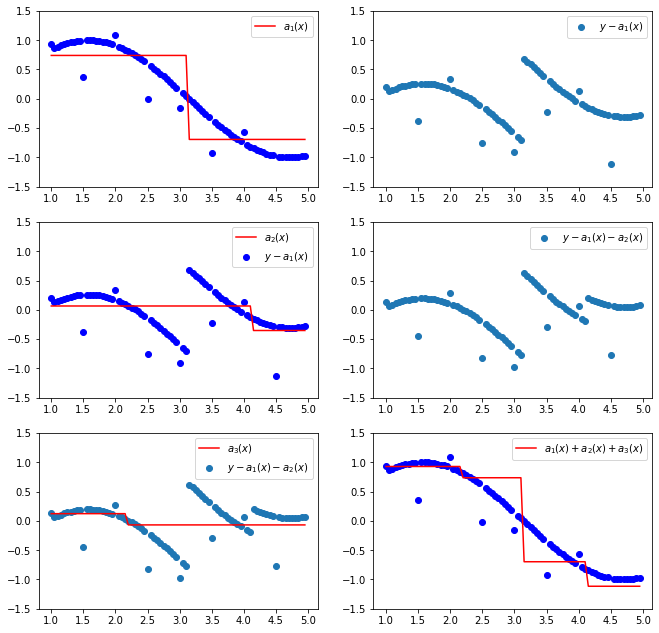

In [ ]:
plt.figure(figsize=(11,11))

plt.subplot(321)
plt.plot(X, dt_reg1.predict(X.reshape(-1,1)), label="$a_1(x)$", c='r')
plt.scatter(X, y, c='b')
plt.ylim([-1.5, 1.5])
plt.legend()

plt.subplot(322)
plt.scatter(X, y - dt_reg1.predict(X.reshape(-1,1)), label="$y-a_1(x)$")
plt.ylim([-1.5, 1.5])
plt.legend()

plt.subplot(323)
plt.plot(X, dt_reg2.predict(X.reshape(-1,1)), label="$a_2(x)$", c='r')
plt.scatter(X, y - dt_reg1.predict(X.reshape(-1,1)), label="$y-a_1(x)$", c='b')
plt.ylim([-1.5, 1.5])
plt.legend()

plt.subplot(324)
plt.scatter(X, y - dt_reg1.predict(X.reshape(-1,1)) -dt_reg2.predict(X.reshape(-1,1)), label="$y-a_1(x)-a_2(x)$")
plt.ylim([-1.5, 1.5])
plt.legend()

plt.subplot(325)
plt.plot(X, dt_reg3.predict(X.reshape(-1,1)), label="$a_3(x)$", c='r')
plt.scatter(X, y - dt_reg1.predict(X.reshape(-1,1)) -dt_reg2.predict(X.reshape(-1,1)), label="$y-a_1(x)-a_2(x)$")
plt.ylim([-1.5, 1.5])
plt.legend()

plt.subplot(326)
plt.plot(X, dt_reg1.predict(X.reshape(-1,1))+dt_reg2.predict(X.reshape(-1,1))+dt_reg3.predict(X.reshape(-1,1)), label="$a_1(x)+a_2(x)+a_3(x)$", c='r')
plt.scatter(X, y, c='b')
plt.ylim([-1.5, 1.5])
plt.legend()

plt.show()

**Q3.** A ML engineer has found the following observations


x|y
-|-
1|6
2|6
3|12
4|18

with two trees $x>2.5$ and $x>3.5$

He decided to use Boosting with learning rate $\eta$. Which predictions he gets in the leafs minimizing the following Loss (used in xgboost)
$$
Q = \sum_{i=1}^{n} (y_i-a(x_i))^2 + \lambda \sum_{j=1}^{J} y_j^2,
$$
where $J$ is the number of leaves?
* 1. $\eta=1$ and $\lambda=1$
* 2. $\eta=0.5$ and $\lambda=1$

*Solution 1*

For the first tree $R_l$ contains $x=1$ and $2$ and $R_r$ contains $x=3$ and $4.$
To find the values $y_l$ and $y_r$ in the leaves, we should solve the following optimization problem:
$$
Q(R_l) = (6-y_l)^2+(6-y_l)^2 + y_l^2+y_r^2\to min
$$
$$
Q(R_r) = (12-y_r)^2+(18-y_r)^2 + y_l^2+y_r^2\to min
$$
Let's find the stationary point:
$$
\frac{\partial Q(R_l)}{\partial y_l} = -2(6-y_l)-2(6-y_l) + 2y_l =0
$$
$$
\frac{\partial Q(R_r)}{\partial y_r} = 2(12-y_r)+2(18-y_r) + 2y_r =0
$$
We will get $y_l = 4$ and $y_r=10.$

# Gradient Boosting (Friedman, J. H., 1999)

Assume, we built first $k$ models
$$
y_i \approx a_1(x_i)+a_2(x_i)+\ldots +a_k(x_i).
$$
To find model $a_{k+1}(x)$ we should minimize
$$
\frac{1}{N}\sum_{i=1}^N L(y_i, a_1(x_i)+a_2(x_i)+\ldots +a_k(x_i)+a_{k+1}(x)) \to min
$$

If we take a look at the function $L(y_i, z),$ then for small $s$ proportional to $- \frac{\partial L(y_i,z)}{\partial z}$
$$
 L(y_i, z+s) \leq L(y_i, z)
$$
because we shift $z$ in the direction of decreasing of $L(y_i,z)$.

We can use so called learning rate coeffitient $\eta$ to ensure the shift is not too large. Denote
$$
s_i^{(k+1)} = -\left. \frac{\partial L(y_i, z)}{\partial z}\right|_{z=a_1(x_i)+a_2(x_i)+\ldots +a_k(x_i)}.
$$
Then we can find the model $a_{k+1}(x)$ as MSE approximation of $s_i^{(k+1)}$
$$
\frac{1}{N}\sum_{i=1}^N (s_i^{(k+1)}- a_{k+1}(x))^2 \to min
$$

If we use a constant learning rate, the model will look like this
$$
a(x) = \eta\sum_{k=1}^{K} a_k(x).
$$

In [ ]:
import lightgbm as lgb

In [ ]:
housing = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
y = housing['median_house_value']
housing.drop(columns=['median_house_value'], inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
transform = ColumnTransformer([('OneHot', OneHotEncoder(drop='first'), ['ocean_proximity'])], remainder='passthrough')
transform.fit(X_train)
X_train_hot = pd.DataFrame(transform.transform(X_train), columns=transform.get_feature_names_out())
X_test_hot = pd.DataFrame(transform.transform(X_test), columns=transform.get_feature_names_out())
X_train_hot.head()

,OneHot__ocean_proximity_INLAND,OneHot__ocean_proximity_ISLAND,OneHot__ocean_proximity_NEAR BAY,OneHot__ocean_proximity_NEAR OCEAN,remainder__longitude,remainder__latitude,remainder__housing_median_age,remainder__total_rooms,remainder__total_bedrooms,remainder__population,remainder__households,remainder__median_income
0,0.0,0.0,0.0,1.0,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596
1,0.0,0.0,0.0,1.0,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125
2,0.0,0.0,0.0,1.0,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563
3,0.0,0.0,0.0,1.0,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425
4,1.0,0.0,0.0,0.0,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542


In [ ]:
gb = lgb.LGBMRegressor(num_leaves=31, learning_rate=0.2, n_estimators=100) #, reg_alpha=0.1, reg_lambda=0.1

In [ ]:
gb.fit(X_train_hot, y_train, eval_set=[(X_train_hot, y_train),(X_test_hot, y_test)]) #early_stopping_rounds=6

[1]	training's l2: 1.01217e+10	valid_1's l2: 9.95169e+09
[2]	training's l2: 7.96393e+09	valid_1's l2: 7.8797e+09
[3]	training's l2: 6.48391e+09	valid_1's l2: 6.47392e+09
[4]	training's l2: 5.4698e+09	valid_1's l2: 5.52144e+09
[5]	training's l2: 4.78855e+09	valid_1's l2: 4.90955e+09
[6]	training's l2: 4.28122e+09	valid_1's l2: 4.45542e+09
[7]	training's l2: 3.91203e+09	valid_1's l2: 4.12646e+09
[8]	training's l2: 3.61399e+09	valid_1's l2: 3.86762e+09
[9]	training's l2: 3.39368e+09	valid_1's l2: 3.66858e+09
[10]	training's l2: 3.21057e+09	valid_1's l2: 3.50794e+09
[11]	training's l2: 3.0538e+09	valid_1's l2: 3.37154e+09
[12]	training's l2: 2.92199e+09	valid_1's l2: 3.25241e+09
[13]	training's l2: 2.79435e+09	valid_1's l2: 3.14419e+09
[14]	training's l2: 2.7135e+09	valid_1's l2: 3.0844e+09
[15]	training's l2: 2.60379e+09	valid_1's l2: 2.97335e+09
[16]	training's l2: 2.53691e+09	valid_1's l2: 2.92507e+09
[17]	training's l2: 2.44792e+09	valid_1's l2: 2.83603e+09
[18]	training's l2: 2.3943e+

LGBMRegressor(learning_rate=0.2)

In [ ]:
gb.score(X_test_hot, y_test)

0.8315305268660333

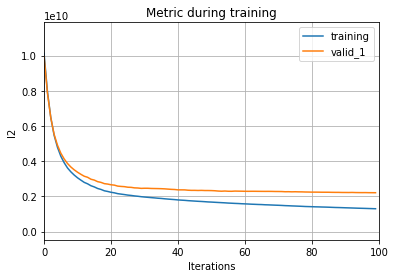

In [ ]:
lgb.plot_metric(gb)

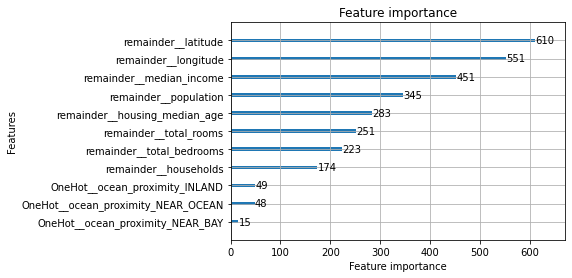

In [ ]:
lgb.plot_importance(gb)